In [5]:
#!/usr/bin/python3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Read csv
data = pd.read_csv('device_failure.csv')

# How many devices failed?
# Filter all devices that have failed
# Remove duplicates and counted total devices
# Output: 106
devices_failed = data.loc[data['failure'] == 1]
len(devices_failed['device'].unique())

106

In [7]:
# How often do they fail? 

# Got the mean fail for each device by grouping by device and converting total failures to percentage.
# Exclude all devices that are not 0%
# Change column names
# Output: new dataframe with devices and total percentage of failures
mean_fails = data.groupby('device')['failure'].apply(lambda x: x.mean() * 100).reset_index()
percent_fails = mean_fails[mean_fails['failure'] != 0].set_index('device')
percent_fails.columns = ["%_failure"]
print(percent_fails)

          %_failure
device             
S1F023H2   5.263158
S1F03YZM   0.465116
S1F09DZQ   0.502513
S1F0CTDN  14.285714
S1F0DSTY   2.222222
S1F0F4EB   0.787402
S1F0GG8X   5.555556
S1F0GJW3   1.315789
S1F0GKFX   0.854701
S1F0GKL6   0.751880
S1F0GPFZ   0.487805
S1F0GSD9   0.675676
S1F0GSHB   0.465116
S1F0J5JH   0.518135
S1F0JD7P   1.010101
S1F0JGJV   0.359712
S1F0L0DW   0.709220
S1F0LCTV   3.846154
S1F0LCVC   0.847458
S1F0LD15   0.497512
S1F0LD2C   1.315789
S1F0P3G2   5.000000
S1F0PJJW   1.666667
S1F0QF3R   0.675676
S1F0QY11   5.263158
S1F0RR35   1.149425
S1F0RRB1  20.000000
S1F0RSZP   0.900901
S1F0S2WJ   5.263158
S1F0S4CA   1.724138
...             ...
W1F1BS0H   0.526316
W1F1BZTM   0.833333
W1F1C9TE   1.851852
W1F1C9WG   0.787402
W1F1CB5E   0.462963
W1F1CDDP   1.075269
W1F1CJ1K   0.515464
W1F1DQN8   0.471698
Z1F04GCH   2.000000
Z1F0B4XZ   0.847458
Z1F0FSBY   1.282051
Z1F0K451   0.763359
Z1F0LSNZ   0.564972
Z1F0LVGY   2.857143
Z1F0LVPW   5.263158
Z1F0MCCA   2.857143
Z1F0MRPJ   0.434783


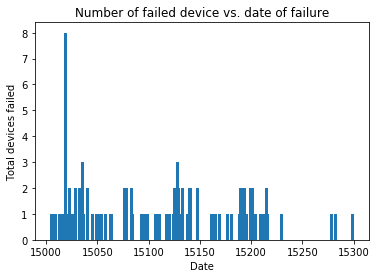

In [8]:
# when do they fail?

# Counted all devices that failed by date
# Created a bar graph to characterize results
# Output: bar graph of result
date_failed = devices_failed.groupby('date')['device'].count().reset_index()
plt.bar('date', 'device', data=date_failed, width=3)

plt.title("Number of failed device vs. date of failure")
plt.xlabel("Date")
plt.ylabel('Total devices failed')

plt.show()